## Arewa DataScience Academy
## Arewa DataScience Academy
### Deep Learning Cohort 2.0

### WEEK 2 Solution

In [13]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1'


    1. Create a straight line dataset using the linear regression formula (weight * X + bias).

    Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
    Split the data into 80% training, 20% testing.
    Plot the training and testing data so it becomes visual.


In [14]:
weight = 0.3
bias = 0.9

# creating the dataset
X = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y = weight * X + bias
print(X[:10], y[:10], '\n')
print(f'X samples: {len(X)},  y samples: {len(y)}')


tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]]) tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]]) 

X samples: 100,  y samples: 100


In [15]:
# splitting the dataset
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

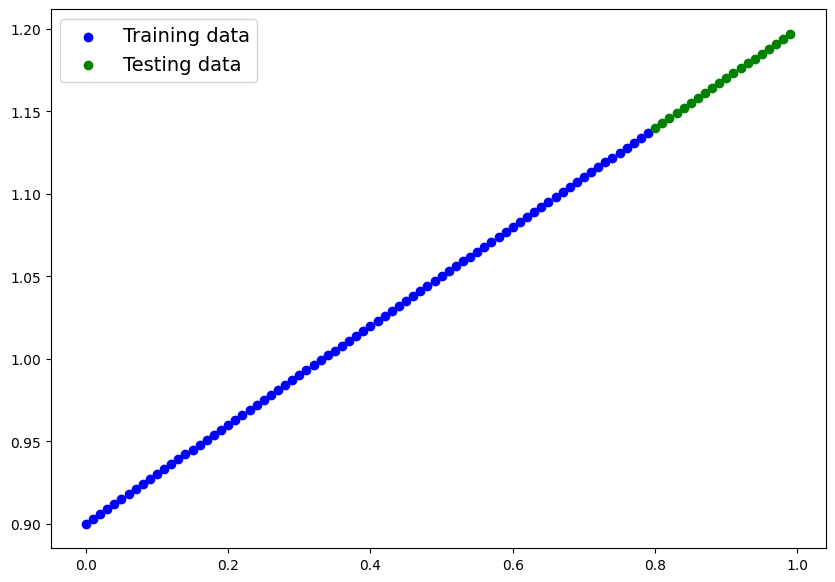

In [16]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});
plot_predictions()


    2. Build a PyTorch model by subclassing nn.Module.

    Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
    Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
    Once you've constructed the model, make an instance of it and check its state_dict().
    Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.


In [17]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)

  # forward pass
  def forward(self, x: torch.Tensor):
    return self.weight * x + self.bias

# setting manual seed
torch.manual_seed(42)
# model instance
model_1 = LinearModel()
print(model_1)
# model state dict
print(model_1.state_dict())


LinearModel()
OrderedDict({'weight': tensor([0.3367]), 'bias': tensor([0.1288])})



    3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

    Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
    Write a training loop to perform the appropriate training steps for 300 epochs.
    The training loop should test the model on the test dataset every 20 epochs.


In [6]:
# creating loss function
loss_function = nn.L1Loss()

# setting optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [7]:

torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  # TRAINING THE MODEL
  model_1.train()  #training mode
  y_pred = model_1(X_train) #forward pass on training data
  loss = loss_function(y_pred, y_train)  #difference bitween prediction and actual values
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() # progress the optimizer

  # TESTING THE MODEL
  model_1.eval() #setting in evaluation mode

  with torch.inference_mode():
    test_pred = model_1(X_test) #test prediction
    test_loss = loss_function(test_pred, y_test.type(torch.float))  # get the loss

    # Print out what's happening
    if epoch % 20 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.7566978335380554 | MAE Test Loss: 0.7248174548149109 
Epoch: 20 | MAE Train Loss: 0.5254928469657898 | MAE Test Loss: 0.4541124403476715 
Epoch: 40 | MAE Train Loss: 0.2942880392074585 | MAE Test Loss: 0.18340764939785004 
Epoch: 60 | MAE Train Loss: 0.07658576965332031 | MAE Test Loss: 0.07274086028337479 
Epoch: 80 | MAE Train Loss: 0.05255373567342758 | MAE Test Loss: 0.11581540107727051 
Epoch: 100 | MAE Train Loss: 0.045542728155851364 | MAE Test Loss: 0.10467890650033951 
Epoch: 120 | MAE Train Loss: 0.03868866711854935 | MAE Test Loss: 0.08938358724117279 
Epoch: 140 | MAE Train Loss: 0.03183453157544136 | MAE Test Loss: 0.07408786565065384 
Epoch: 160 | MAE Train Loss: 0.024982359260320663 | MAE Test Loss: 0.0581042543053627 
Epoch: 180 | MAE Train Loss: 0.018130185082554817 | MAE Test Loss: 0.04212062805891037 
Epoch: 200 | MAE Train Loss: 0.011278990656137466 | MAE Test Loss: 0.02579306997358799 
Epoch: 220 | MAE Train Loss: 0.004429381340742111 |


    4. Make predictions with the trained model on the test data.

    Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).


In [8]:
# set the model in evaluation mode
model_1.eval()

with torch.inference_mode():

  y_pred = model_1(X_test)
y_pred

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]])

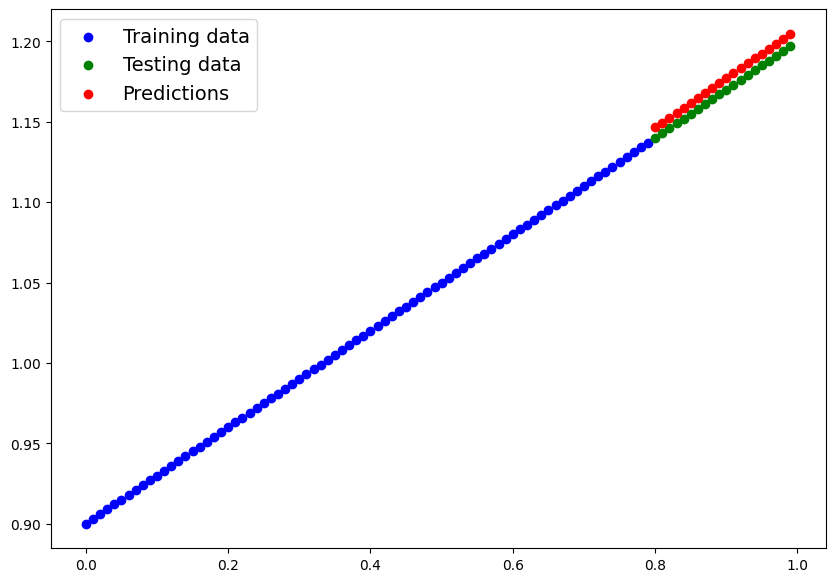

In [9]:
plot_predictions(predictions = y_pred)


    5. Save your trained model's state_dict() to file.

    Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
    Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.


In [10]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [11]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearModel()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearModel()
Model on device:
cpu


/tmp/ipykernel_3842/1557162179.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


In [12]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_pred == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Additional Exercises Solutions

In [21]:
# import libraries
import zipfile
import pandas as pd

In [22]:
!wget https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip -O data.zip

--2025-01-30 11:48:28--  https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [ <=>                ]  14.37K  --.-KB/s    in 0.1s    

2025-01-30 11:48:29 (112 KB/s) - ‘data.zip’ saved [14713]



In [23]:
!unzip -q data.zip -d dataset

In [24]:
!ls dataset


'synchronous machine.csv'


In [25]:
# read csv and parse to pandas
dataset_name = "dataset/synchronous machine.csv"
data = pd.read_csv(dataset_name, delimiter=";", thousands=',')

In [26]:
# get numpy data
numpy_data = data.values

# 1. PyTorch Fundamentals
**Question 1.** Loading our data...

(a) Load the Synchronous Machine Learning Dataset as Numpy array.

In [27]:
# Print shape and first few rows
print("Dataset Shape:", numpy_data.shape)
print("First 5 rows:\n", numpy_data[:5])


Dataset Shape: (557, 5)
First 5 rows:
 [[   3   66   34  383 1563]
 [   3   68   32  372 1552]
 [   3    7    3   36  154]
 [   3   72   28  338 1518]
 [   3   74   26  317 1497]]


(b) Convert the Numpy array to PyTorch tensor, original data tensor.

In [28]:
# Convert NumPy array to PyTorch tensor
original_data_tensor = torch.tensor(numpy_data, dtype=torch.float32)


__Question 2.__ Art of ”Tensor Manipulation”

(a) Print the size of the dataset.

In [29]:
# Print size and first few rows of the tensor dataset
print("Tensor Shape:", original_data_tensor.shape)
print("First 5 rows:\n", original_data_tensor[:5])

Tensor Shape: torch.Size([557, 5])
First 5 rows:
 tensor([[   3.,   66.,   34.,  383., 1563.],
        [   3.,   68.,   32.,  372., 1552.],
        [   3.,    7.,    3.,   36.,  154.],
        [   3.,   72.,   28.,  338., 1518.],
        [   3.,   74.,   26.,  317., 1497.]])


(b) Create a tensor, my pi tensor of same size as original data tensor containing values of 3.142 at
every point and placed on your GPU device. Print the first 13 rows. Print tensor device location.
Print tensor datatype.

In [30]:
# checking for the gpu device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [31]:
# Create a tensor of the same shape as data_tensor, filled with 3.142
my_pi_tensor = torch.full_like(original_data_tensor, 3.142, dtype=torch.float32, device=device)

# Print the first 13 rows
print("First 13 rows of my_pi_tensor:\n", my_pi_tensor[:13],'\n')

# Print tensor device location
print("Tensor is stored on:", my_pi_tensor.device)

# Print tensor datatype
print("Tensor datatype:", my_pi_tensor.dtype)


First 13 rows of my_pi_tensor:
 tensor([[3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420]]) 

Tensor is stored on: cpu
Tensor datatype: torch.float32


(c) Print the fifth-root of the sum of all values in my pi tensor.

In [32]:
# Compute the sum of all values in my_pi_tensor
sum_pi = my_pi_tensor.sum()

# Compute the fifth root
fifth_root = sum_pi ** (1/5)

# Print the result
print("Fifth root of the sum of all values in my_pi_tensor:", fifth_root.item())


Fifth root of the sum of all values in my_pi_tensor: 6.143364429473877


(d) Create a new tensor, my data tensor using the first and last 100 rows from the original data tensor.
Print size of my data tensor [Expect a size of 200 rows].

In [33]:
# Select first and last 100 rows
first_100 = original_data_tensor[:100]
last_100 = original_data_tensor[-100:]

# Create my_data_tensor by concatenation
my_data_tensor = torch.cat((first_100, last_100), dim=0)

# Print size
print("Size of my_data_tensor:", my_data_tensor.shape)


Size of my_data_tensor: torch.Size([200, 5])


(e) Create two 1-D tensors, features and target from my data tensor. The feature is dIf (Changing
of excitation current of synchronous machine) I) column and target is If (Excitation current of
synchronous machine).

In [34]:
print(data.columns)  # Identify which index belongs to dIf and If


Index(['Iy', 'PF', 'e', 'dIf', 'If'], dtype='object')


In [35]:
# set the column indices for features and target
features = my_data_tensor[:, 3]  # Selecting dIf column
target = my_data_tensor[:, 4]  # Selecting If column

print("Feature (dIf) Tensor Shape:", features.shape)
print("Target (If) Tensor Shape:", target.shape)

print("First 5 values of features (dIf):", features[:5])
print("First 5 values of target (If):", target[:5])



Feature (dIf) Tensor Shape: torch.Size([200])
Target (If) Tensor Shape: torch.Size([200])
First 5 values of features (dIf): tensor([383., 372.,  36., 338., 317.])
First 5 values of target (If): tensor([1563., 1552.,  154., 1518., 1497.])


(f) Split your data into training and test data of ratio 75:25 respectively.

In [36]:
# splitting the dataset
train_split = int(0.75 * len(my_data_tensor))
X_train, X_test = features[:train_split], features[train_split:]
y_train, y_test = target[:train_split], target[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(150, 150, 50, 50)

# 2. PyTorch Workflow Fundamentals
__Question 3.__ Define your Linear model structure. You can use existing model.

In [76]:
# setting manual seed
torch.manual_seed(42)
# model instance
model_2 = LinearModel()
print(model_2)
# model state dict
print(model_2.state_dict())

LinearModel()
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


**Question 4.** Train model for any number of epochs. Generate 1 plot of Loss against Epoch during model
training and testing. Choose any set of hyperparameters for model training.

In [77]:
# Creating the loss function
loss_function = nn.L1Loss()

# Setting optimizer to Adam
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.001)


In [80]:

torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  # TRAINING THE MODEL
  model_2.train()  #training mode
  y_pred = model_2(X_train) #forward pass on training data
  loss = loss_function(y_pred, y_train)  #difference bitween prediction and actual values
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() # progress the optimizer

  # TESTING THE MODEL
  model_1.eval() #setting in evaluation mode

  with torch.inference_mode():
    test_pred = model_2(X_test) #test prediction
    test_loss = loss_function(test_pred, y_test.type(torch.float))  # get the loss

    # Print out what's happening
    if epoch % 20 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 1176.56494140625 | MAE Test Loss: 1261.9364013671875 
Epoch: 20 | MAE Train Loss: 1170.859130859375 | MAE Test Loss: 1253.7633056640625 
Epoch: 40 | MAE Train Loss: 1165.1534423828125 | MAE Test Loss: 1245.5902099609375 
Epoch: 60 | MAE Train Loss: 1159.4476318359375 | MAE Test Loss: 1237.4171142578125 
Epoch: 80 | MAE Train Loss: 1153.7418212890625 | MAE Test Loss: 1229.244140625 
Epoch: 100 | MAE Train Loss: 1148.0360107421875 | MAE Test Loss: 1221.0709228515625 
Epoch: 120 | MAE Train Loss: 1142.330078125 | MAE Test Loss: 1212.89794921875 
Epoch: 140 | MAE Train Loss: 1136.62451171875 | MAE Test Loss: 1204.7247314453125 
Epoch: 160 | MAE Train Loss: 1130.918701171875 | MAE Test Loss: 1196.5516357421875 
Epoch: 180 | MAE Train Loss: 1125.2127685546875 | MAE Test Loss: 1188.3785400390625 


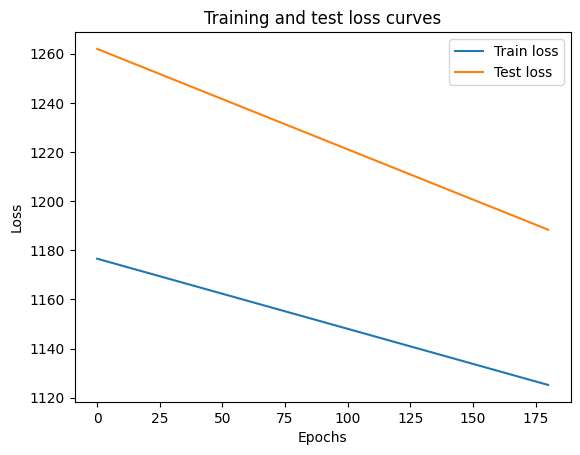

In [81]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

__Question 5.__ Briefly comment on your results. What could be done to make the model or prediction
better? (< 60 words)

The model's training and test loss decrease steadily, indicating that is learning, but the performance is still relatively high. To improve the model, consider using a more complex architecture, tuning hyperparameters like learning rate, or using a different loss function to optimize better. More data could also enhance model generalization and performance.